In [1]:
!pip install tensorflow

In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
RANDOM_SEED = 42

# 各パス指定

In [3]:
dataset = '/content/dataset/keypoint.csv'
model_save_path = '/content/dataset/keypoint_classifier.keras'

# 分類数設定

In [4]:
NUM_CLASSES = 12

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 12)                132       
                                                                 
Total params: 1202 (4.70 KB)
Trainable params: 1202 (4.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# import os

# hdf5_file_path = "model/keypoint_classifier/keypoint_classifier.hdf5"
# keras_file_path = hdf5_file_path[:-5] + ".keras"  # Replace the file extension
# os.rename(hdf5_file_path, keras_file_path)

In [11]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [14]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=1000,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.6489 - accuracy: 0.4170
Epoch 1: saving model to /content/dataset/keypoint_classifier.keras
4/4 [==============================] - 0s 79ms/step - loss: 1.6414 - accuracy: 0.4239 - val_loss: 1.5013 - val_accuracy: 0.5073
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.6092 - accuracy: 0.4130
Epoch 2: saving model to /content/dataset/keypoint_classifier.keras
4/4 [==============================] - 0s 88ms/step - loss: 1.5950 - accuracy: 0.4333 - val_loss: 1.4514 - val_accuracy: 0.5081
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.5341 - accuracy: 0.4650
Epoch 3: saving model to /content/dataset/keypoint_classifier.keras
4/4 [==============================] - 0s 69ms/step - loss: 1.5347 - accuracy: 0.4516 - val_loss: 1.4051 - val_accuracy: 0.5158
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.5243 - accuracy: 0.4470
Epoch 4: saving model to /content/da

In [15]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.9086


In [17]:

model = tf.keras.models.load_model('/content/dataset/keypoint_classifier.keras')

In [18]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 116ms/step
[1.0575169e-02 8.8397539e-01 4.4167165e-02 5.4126427e-05 6.1218917e-02
 5.3174062e-07 3.5189933e-06 4.2558608e-07 4.8570069e-08 9.1466171e-07
 4.9566279e-07 3.3293495e-06]
1


# 混同行列

37/37 [==============================] - 0s 2ms/step


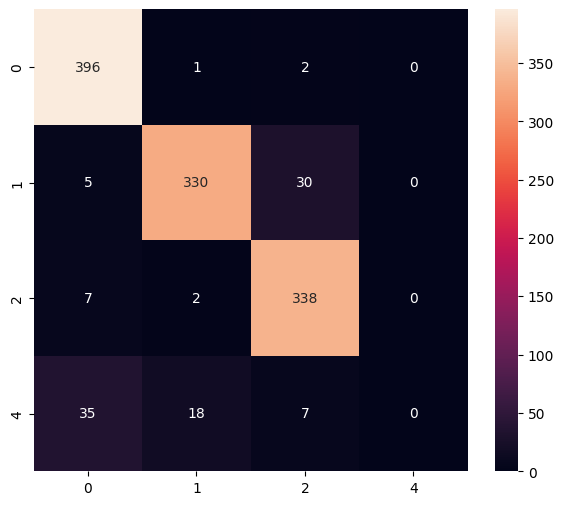

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       399
           1       0.94      0.90      0.92       365
           2       0.90      0.97      0.93       347
           4       0.00      0.00      0.00        60

    accuracy                           0.91      1171
   macro avg       0.68      0.72      0.70      1171
weighted avg       0.86      0.91      0.88      1171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [26]:
# 推論専用のモデルとして保存
model.save(model_save_path, format="h5", include_optimizer=False)

ValueError: The following argument(s) are not supported with the native Keras format: ['format', 'include_optimizer']

In [22]:
# モデルを変換(量子化)
tflite_save_path = '/content/dataset/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

6896

# 推論テスト

In [23]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [24]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [25]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [27]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 123 µs, sys: 942 µs, total: 1.07 ms
Wall time: 1.19 ms


In [28]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0575160e-02 8.8397539e-01 4.4167165e-02 5.4126380e-05 6.1218888e-02
 5.3174017e-07 3.5189901e-06 4.2558568e-07 4.8569976e-08 9.1465995e-07
 4.9566182e-07 3.3293434e-06]
1
